# Objective
Plot and compare P-x diagrams of ANN and EOS of the $nC_4-nC_{10}$ binary mixture.  

Plot P-x diagram for nC4-nC10 binary.
Compare ANN and EOS output




In [1]:
from Stability_and_flash import pr as PR
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Instantiate class for ANN
pr = PR()
pr.useModel = False


In [3]:
#####################################################################################

# Load models
modelPath = [
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226',
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC10_T300-600_P5-100__100_4_20_100_20200915-230243'
]
pipelinePath = [
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\full_pipeline_lnphi_nC4_T300-600_P5-100__100_4_20_100_.pkl',
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC10_T300-600_P5-100__100_4_20_100_20200915-230243\full_pipeline_lnphi_nC4_T300-600_P5-100__100_4_20_100_.pkl'
]
pr.load_ANN_model(modelPath, pipelinePath)


Model loading successful.


In [4]:
# INPUTS
T = 500  # [K] [620, 650]

# nC4-C10
z = np.empty(2)
w = np.array([0.193, 0.49])
Pc = np.array([37.997, 21.1])  # [bar]
Tc = np.array([425.2, 617.6])  # [K]
BIP = np.zeros([2, 2])

NRtol = 1E-12
NRmaxit = 100  # I think 10 is enough
SStol = 1E-6  #1E-10 for EOS, 1E-6 for ANN.
tolSSSA = 1E-5
SSmaxit = 500  # 1000000 # 1E6 might crash my computer.
TolRR = 1E-10
TolXz = 1E-8
itSSSAmax = 1E6

# More global constants
Tr = T / Tc

Nc = len(w)

In [5]:
# Define values for storing bubble and dew curves
pr.y_nC4 = []
pr.x_nC4 = []
pr.Pressure = []

In [6]:
go_next_P = False
z_next = False
use_previous_z = False

for P in np.linspace(5,48,25):
    Pr = P / Pc
    for z[0] in np.linspace(0.001, 0.999, 10):
        z[1] = 1. - z[0]
        # If z_next exists, use it. Else, keep iterated z.
        if use_previous_z:
            z = z_next
            
        # Get all K-values from Wilson
        K = pr.wilson_corr(Pr, Tr, w)
        ln_K = np.log(K)

        # Get all ai, bi values
        a_i, b_i = pr.aibi(P, T, w, Pr, Tr, Pc, Tc)

        # Get Vw mixing, part with BIPs and square roots
        Am = pr.Vw(Nc,a_i,BIP)
        ##########################################################################################
        # Debug
        pr.tmp_list = []
        pr.z_list = []
        # Stability Analysis
        sumXX_list, liq_case, vap_case = pr.stability_analysis(T, P, z, b_i, Am, tolSSSA, itSSSAmax, Nc, K, TolXz)

        # Get TPD
        TPD = -math.log(max(sumXX_list))

        print('At P = %s bar, T = %s K, z = %s' % (P, T, z))
        if liq_case < 0 or vap_case < 0:
            print('Single phase unstable, TPD = %s' % TPD)
            print('Run 2-phase flash.')
            # Now call 2-phase flash func. Return only converged composition. Optimize by re-using calculated
            # variables.
            liq_comp, vap_comp = pr.two_phase_flash_iterate(Pr, Tr, w, SSmaxit, SStol, TolRR, Nc, Am, b_i, NRmaxit, z)
            print('liq and vap comp:')
            print(liq_comp, vap_comp)
            
            # Store for P-x plot
            pr.y_nC4.append(list(vap_comp))
            pr.x_nC4.append(list(liq_comp))
            pr.Pressure.append(P)
            
            # Next iteration
            z_next = 0.5 * (liq_comp + vap_comp)
            use_previous_z = True
            break

        elif liq_case > 0 and vap_case > 0:
            print('Single phase stable')            
            use_previous_z = False

print('END')

SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
At P = 5.0 bar, T = 500 K, z = [0.001 0.999]
Single phase stable
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
At P = 5.0 bar, T = 500 K, z = [0.11188889 0.88811111]
Single phase unstable, TPD = -0.

At P = 28.291666666666668 bar, T = 500 K, z = [0.63057522 0.36942478]
Single phase unstable, TPD = -0.1294464798725927
Run 2-phase flash.
[3.50201616 0.11358543]
SS Flash outer loop count: 0
Vapor frac: 0.5637264767666255
Liquid comp: [0.26160032 0.73839968]
Vapor comp: [0.91612855 0.08387145]
K old: [3.50201616 0.11358543]
K new: [1.95364714 0.26879706]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.47499957364785217
Liquid comp: [0.43398695 0.56601305]
Vapor comp: [0.84785736 0.15214264]
K old: [1.95364714 0.26879706]
K new: [1.83031722 0.30073605]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.45684989371368634
Liquid comp: [0.45716041 0.54283959]
Vapor comp: [0.83674856 0.16325144]
K old: [1.83031722 0.30073605]
K new: [1.80781867 0.30751081]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.4532806231784417
Liquid comp: [0.46156473 0.53843527]
Vapor comp: [0.83442533 0.16557

K new: [1.25905279 0.4545971 ]
########################################
SS Flash outer loop count: 8
Vapor frac: 0.4278614284508123
Liquid comp: [0.67797756 0.32202244]
Vapor comp: [0.85360953 0.14639047]
K old: [1.25905279 0.4545971 ]
K new: [1.25830692 0.4553633 ]
########################################
SS Flash outer loop count: 9
Vapor frac: 0.4270522141659988
Liquid comp: [0.67830006 0.32169994]
Vapor comp: [0.85350965 0.14649035]
K old: [1.25830692 0.4553633 ]
K new: [1.25790203 0.455776  ]
########################################
SS Flash outer loop count: 10
Vapor frac: 0.4266003962849532
Liquid comp: [0.67847692 0.32152308]
Vapor comp: [0.8534575 0.1465425]
K old: [1.25790203 0.455776  ]
K new: [1.25768168 0.4559987 ]
########################################
SS Flash outer loop count: 11
Vapor frac: 0.42634831405192336
Liquid comp: [0.6785741 0.3214259]
Vapor comp: [0.85343021 0.14656979]
K old: [1.25768168 0.4559987 ]
K new: [1.25756157 0.45611901]
##########################

K old: [1.09337536 0.69333126]
K new: [1.09336918 0.69334597]
########################################
SS Flash outer loop count: 51
Vapor frac: 0.3362371990012975
Liquid comp: [0.76659059 0.23340941]
Vapor comp: [0.83816652 0.16183348]
K old: [1.09336918 0.69334597]
K new: [1.09336382 0.69335872]
########################################
SS Flash outer loop count: 52
Vapor frac: 0.3362156947342948
Liquid comp: [0.76659342 0.23340658]
Vapor comp: [0.83816551 0.16183449]
K old: [1.09336382 0.69335872]
K new: [1.09335918 0.69336976]
########################################
SS Flash outer loop count: 53
Vapor frac: 0.3361969684852197
Liquid comp: [0.76659588 0.23340412]
Vapor comp: [0.83816464 0.16183536]
K old: [1.09335918 0.69336976]
K new: [1.09335515 0.69337932]
########################################
SS Flash outer loop count: 54
Vapor frac: 0.336180661657373
Liquid comp: [0.76659802 0.23340198]
Vapor comp: [0.83816389 0.16183611]
K old: [1.09335515 0.69337932]
K new: [1.09335166 0.6

Text(0, 0.5, 'Pressure [bar]')

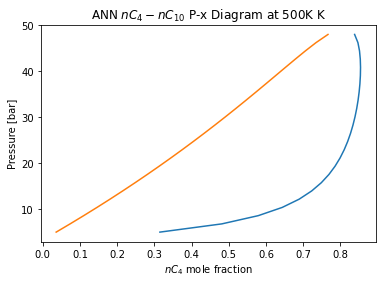

In [7]:
EOS_y_nC4 = np.array(pr.y_nC4)
EOS_x_nC4 = np.array(pr.x_nC4)
EOS_Pressure = pr.Pressure

fig = plt.figure('''figsize=(20,20)''')
ax = fig.add_subplot(111)
ax.plot(EOS_y_nC4[:,0], EOS_Pressure, label='Dew Curve')
ax.plot(EOS_x_nC4[:,0], EOS_Pressure, label='Bubble Curve')
ax.set_title(r'ANN $nC_4-nC_{10}$ P-x Diagram at 500K K')
ax.set_xlabel(r'${nC_4}$ mole fraction')
ax.set_ylabel('Pressure [bar]')

In [8]:
pr.useModel = True


In [9]:
# Define values for storing bubble and dew curves
pr.y_nC4 = []
pr.x_nC4 = []
pr.Pressure = []

In [10]:
go_next_P = False
z_next = False
use_previous_z = False

for P in np.linspace(5,48,25):
    Pr = P / Pc
    for z[0] in np.linspace(0.001, 0.999, 10):
        z[1] = 1. - z[0]
        # If z_next exists, use it. Else, keep iterated z.
        if use_previous_z:
            z = z_next
            
        # Get all K-values from Wilson
        K = pr.wilson_corr(Pr, Tr, w)
        ln_K = np.log(K)

        # Get all ai, bi values
        a_i, b_i = pr.aibi(P, T, w, Pr, Tr, Pc, Tc)

        # Get Vw mixing, part with BIPs and square roots
        Am = pr.Vw(Nc,a_i,BIP)
        ##########################################################################################
        # Debug
        pr.tmp_list = []
        pr.z_list = []
        # Stability Analysis
        sumXX_list, liq_case, vap_case = pr.stability_analysis(T, P, z, b_i, Am, tolSSSA, itSSSAmax, Nc, K, TolXz)

        # Get TPD
        TPD = -math.log(max(sumXX_list))

        print('At P = %s bar, T = %s K, z = %s' % (P, T, z))
        if liq_case < 0 or vap_case < 0:
            print('Single phase unstable, TPD = %s' % TPD)
            print('Run 2-phase flash.')
            # Now call 2-phase flash func. Return only converged composition. Optimize by re-using calculated
            # variables.
            liq_comp, vap_comp = pr.two_phase_flash_iterate(Pr, Tr, w, SSmaxit, SStol, TolRR, Nc, Am, b_i, NRmaxit, z)
            print('liq and vap comp:')
            print(liq_comp, vap_comp)
            
            # Store for P-x plot
            pr.y_nC4.append(list(vap_comp))
            pr.x_nC4.append(list(liq_comp))
            pr.Pressure.append(P)
            
            # Next iteration
            z_next = 0.5 * (liq_comp + vap_comp)
            use_previous_z = True
            break # Goes to next pressure iteration

        elif liq_case > 0 and vap_case > 0:
            print('Single phase stable')            
            use_previous_z = False

print('END')

SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
At P = 5.0 bar, T = 500 K, z = [0.001 0.999]
Single phase stable
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
At P = 5.0 bar, T = 500 K, z = [0.11188889 0.88811111]
Single phase unstable, TPD = -0.

Exit flag:1
K old: [5.26572677 0.47365303]
K new: [5.26572692 0.47365303]
########################################
SS Flash outer loop count: 6
Vapor frac: 0.3576666505300441
Liquid comp: [0.10983699 0.89016301]
Vapor comp: [0.57837159 0.42162841]
SA: More than 1 root. Gibb's minimization performed.
Exit flag:2
K old: [5.26572692 0.47365303]
K new: [5.26572692 0.47365303]
########################################
END 2-phase flash
liq and vap comp:
[0.10983699 0.89016301] [0.57837159 0.42162841]
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
At P = 10.375 bar, T = 500 K, z = [0.34410429 0.65589571]
Single phase unsta

SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
SA: More than 1 root. Gibb's minimization performed.
At P = 15.75 bar, T = 500 K, z = [0.46853579 0.53146421]
Single phase unstable, TPD = -0.3921210150909348
Run 2-phase flash.
[6.29065866 0.20403309]
SS Flash outer loop count: 0
Vapor frac: 0.48818395514632534
Liquid comp: [0.1307731 0.8692269]
Vapor comp: [0.82264895 0.17735105]
K old: [6.29065866 0.20403309]
K new: [3.1392906  0.32193336]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.4425577056186864
Liquid comp: [0.24067471 0

At P = 19.333333333333336 bar, T = 500 K, z = [0.52564615 0.47435385]
Single phase unstable, TPD = -0.299531628959677
Run 2-phase flash.
[5.12471761 0.16621661]
SS Flash outer loop count: 0
Vapor frac: 0.5154321635992075
Liquid comp: [0.16815231 0.83184769]
Vapor comp: [0.86173309 0.13826691]
K old: [5.12471761 0.16621661]
K new: [2.630855  0.2927697]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.45238401211484486
Liquid comp: [0.30248267 0.69751733]
Vapor comp: [0.79578806 0.20421194]
K old: [2.630855  0.2927697]
K new: [2.5134249  0.30868128]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.4469220850545442
Liquid comp: [0.3135597 0.6864403]
Vapor comp: [0.78810873 0.21189127]
K old: [2.5134249  0.30868128]
K new: [2.4996982 0.3108021]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.4463930643332284
Liquid comp: [0.31486096 0.68513904]
Vapor comp: [0.78705735 0.21294265]
K old

K old: [2.152967  0.2716552]
K new: [2.0318532  0.29893515]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.45451965836789754
Liquid comp: [0.40455741 0.59544259]
Vapor comp: [0.82200128 0.17799872]
K old: [2.0318532  0.29893515]
K new: [2.0112007  0.30367362]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.45225796796688705
Liquid comp: [0.40779816 0.59220184]
Vapor comp: [0.82016393 0.17983607]
K old: [2.0112007  0.30367362]
K new: [2.0075529  0.30444422]
########################################
SS Flash outer loop count: 4
Vapor frac: 0.45175087846379763
Liquid comp: [0.40840367 0.59159633]
Vapor comp: [0.81989192 0.18010808]
K old: [2.0075529  0.30444422]
K new: [2.0069094 0.3045659]
########################################
SS Flash outer loop count: 5
Vapor frac: 0.4516431109612923
Liquid comp: [0.40851575 0.59148425]
Vapor comp: [0.81985407 0.18014593]
K old: [2.0069094 0.3045659]
K new: [2.0067956 0.3045847]

K old: [1.8591256  0.26879504]
K new: [1.7345599  0.30479184]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.461014453811737
Liquid comp: [0.48623845 0.51376155]
Vapor comp: [0.84340968 0.15659032]
K old: [1.7345599  0.30479184]
K new: [1.7068667  0.31305018]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.4536509200423311
Liquid comp: [0.49285529 0.50714471]
Vapor comp: [0.84123827 0.15876173]
K old: [1.7068667  0.31305018]
K new: [1.6998603  0.31492206]
########################################
SS Flash outer loop count: 4
Vapor frac: 0.4512958095878931
Liquid comp: [0.49466314 0.50533686]
Vapor comp: [0.84085827 0.15914173]
K old: [1.6998603  0.31492206]
K new: [1.6980625  0.31533033]
########################################
SS Flash outer loop count: 5
Vapor frac: 0.4505776988002247
Liquid comp: [0.49515708 0.50484292]
Vapor comp: [0.84080771 0.15919229]
K old: [1.6980625  0.31533033]
K new: [1.6975992 0.315415

K old: [1.529645  0.3350524]
K new: [1.5296334  0.33505026]
########################################
SS Flash outer loop count: 10
Vapor frac: 0.43688117186216785
Liquid comp: [0.55663749 0.44336251]
Vapor comp: [0.85145128 0.14854872]
K old: [1.5296334  0.33505026]
K new: [1.5296297  0.33504924]
########################################
SS Flash outer loop count: 11
Vapor frac: 0.4368755699621196
Liquid comp: [0.55663956 0.44336044]
Vapor comp: [0.85145242 0.14854758]
K old: [1.5296297  0.33504924]
K new: [1.5296289  0.33504882]
########################################
SS Flash outer loop count: 12
Vapor frac: 0.43687390319893943
Liquid comp: [0.55664013 0.44335987]
Vapor comp: [0.8514528 0.1485472]
Exit flag:1
K old: [1.5296289  0.33504882]
K new: [1.5296297 0.335049 ]
########################################
SS Flash outer loop count: 13
Vapor frac: 0.43687517267565906
Liquid comp: [0.55663967 0.44336033]
Vapor comp: [0.85145256 0.14854744]
Exit flag:2
K old: [1.5296297 0.335049 ]
K 

Exit flag:2
K old: [1.4095087 0.3653215]
K new: [1.4095083 0.3653217]
########################################
END 2-phase flash
liq and vap comp:
[0.60782059 0.39217941] [0.85672843 0.14327157]
At P = 39.04166666666667 bar, T = 500 K, z = [0.73227451 0.26772549]
Single phase unstable, TPD = -0.02092512176761829
Run 2-phase flash.
[2.53774704 0.08231004]
SS Flash outer loop count: 0
Vapor frac: 0.6238517302580195
Liquid comp: [0.37373794 0.62626206]
Vapor comp: [0.94845234 0.05154766]
K old: [2.53774704 0.08231004]
K new: [1.5508275  0.28245044]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.534478783119149
Liquid comp: [0.56572262 0.43427738]
Vapor comp: [0.87733817 0.12266183]
K old: [1.5508275  0.28245044]
K new: [1.42163  0.347621]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.48749056590989187
Liquid comp: [0.60742416 0.39257584]
Vapor comp: [0.8635324 0.1364676]
K old: [1.42163  0.347621]
K new: [1.3810498

Exit flag:1
K old: [1.3052988  0.41515085]
K new: [1.3052992  0.41515106]
########################################
SS Flash outer loop count: 16
Vapor frac: 0.4378072220635322
Liquid comp: [0.65702431 0.34297569]
Vapor comp: [0.85761328 0.14238672]
Exit flag:2
K old: [1.3052992  0.41515106]
K new: [1.3052992  0.41515082]
########################################
END 2-phase flash
liq and vap comp:
[0.65702431 0.34297569] [0.85761328 0.14238672]
At P = 42.625 bar, T = 500 K, z = [0.7573188 0.2426812]
Single phase unstable, TPD = -0.009625593629204482
Run 2-phase flash.
[2.3244076  0.07539053]
SS Flash outer loop count: 0
Vapor frac: 0.6358312767100209
Liquid comp: [0.41111714 0.58888286]
Vapor comp: [0.95560381 0.04439619]
K old: [2.3244076  0.07539053]
K new: [1.4605149  0.29251993]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.5434674079411655
Liquid comp: [0.60572184 0.39427816]
Vapor comp: [0.88466578 0.11533422]
K old: [1.4605149  0.29251993]
K 

K old: [1.2081957 0.499151 ]
K new: [1.2062527  0.50070995]
########################################
SS Flash outer loop count: 9
Vapor frac: 0.3973519803884255
Liquid comp: [0.70766805 0.29233195]
Vapor comp: [0.85362648 0.14637352]
K old: [1.2062527  0.50070995]
K new: [1.204924   0.50200903]
########################################
SS Flash outer loop count: 10
Vapor frac: 0.39398581617119594
Liquid comp: [0.70846545 0.29153455]
Vapor comp: [0.85364702 0.14635298]
K old: [1.204924   0.50200903]
K new: [1.2040279 0.5032831]
########################################
SS Flash outer loop count: 11
Vapor frac: 0.39290703521426146
Liquid comp: [0.70884138 0.29115862]
Vapor comp: [0.85346479 0.14653521]
K old: [1.2040279 0.5032831]
K new: [1.2034448  0.50425595]
########################################
SS Flash outer loop count: 12
Vapor frac: 0.39264032655792885
Liquid comp: [0.70902738 0.29097262]
Vapor comp: [0.85327532 0.14672468]
K old: [1.2034448  0.50425595]
K new: [1.2030729 0.50493

K old: [1.1344998 0.5801616]
K new: [1.128849 0.586694]
########################################
SS Flash outer loop count: 14
Vapor frac: 0.190383608852391
Liquid comp: [0.76233914 0.23766086]
Vapor comp: [0.8605658 0.1394342]
K old: [1.128849 0.586694]
K new: [1.1221029 0.5951565]
########################################
SS Flash outer loop count: 15
Vapor frac: 0.1359959624726071
Liquid comp: [0.76828218 0.23171782]
Vapor comp: [0.86209164 0.13790836]
K old: [1.1221029 0.5951565]
K new: [1.1156808 0.605855 ]
########################################
SS Flash outer loop count: 16
Vapor frac: 0.08881022677373149
Liquid comp: [0.77309736 0.22690264]
Vapor comp: [0.8625299 0.1374701]
K old: [1.1156808 0.605855 ]
K new: [1.1088675  0.61657864]
########################################
SS Flash outer loop count: 17
Vapor frac: 0.025774842515190213
Liquid comp: [0.77885439 0.22114561]
Vapor comp: [0.86364634 0.13635366]
K old: [1.1088675  0.61657864]
K new: [1.1002958 0.6408468]
############

K old: [1.3561639  0.31643984]
K new: [1.2346913 0.4386615]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.6726821499242159
Liquid comp: [0.70517276 0.29482724]
Vapor comp: [0.87067064 0.12932936]
K old: [1.2346913 0.4386615]
K new: [1.1851534 0.5060975]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.662091899740527
Liquid comp: [0.72733706 0.27266294]
Vapor comp: [0.86200597 0.13799403]
K old: [1.1851534 0.5060975]
K new: [1.1571573 0.5503503]
########################################
SS Flash outer loop count: 4
Vapor frac: 0.6482402952309061
Liquid comp: [0.74100942 0.25899058]
Vapor comp: [0.85746445 0.14253555]
K old: [1.1571573 0.5503503]
K new: [1.1383315 0.579034 ]
########################################
SS Flash outer loop count: 5
Vapor frac: 0.6130654418143526
Liquid comp: [0.75266918 0.24733082]
Vapor comp: [0.85678705 0.14321295]
K old: [1.1383315 0.579034 ]
K new: [1.1248792  0.59599483]
###########

K old: [1.0577167 0.7877905]
K new: [1.0577196 0.7877308]
########################################
SS Flash outer loop count: 38
Vapor frac: 0.6673731345161276
Liquid comp: [0.78621488 0.21378512]
Vapor comp: [0.83159487 0.16840513]
K old: [1.0577196 0.7877308]
K new: [1.0577071 0.7877841]
########################################
SS Flash outer loop count: 39
Vapor frac: 0.6676493322979783
Liquid comp: [0.78620912 0.21379088]
Vapor comp: [0.83157895 0.16842105]
K old: [1.0577071 0.7877841]
K new: [1.0577036  0.78781575]
########################################
SS Flash outer loop count: 40
Vapor frac: 0.6680329585289884
Liquid comp: [0.78619412 0.21380588]
Vapor comp: [0.83156036 0.16843964]
K old: [1.0577036  0.78781575]
K new: [1.0577071  0.78780335]
########################################
SS Flash outer loop count: 41
Vapor frac: 0.6679985369795797
Liquid comp: [0.78619386 0.21380614]
Vapor comp: [0.83156281 0.16843719]
K old: [1.0577071  0.78780335]
K new: [1.0577093  0.78779083]


Text(0, 0.5, 'Pressure [bar]')

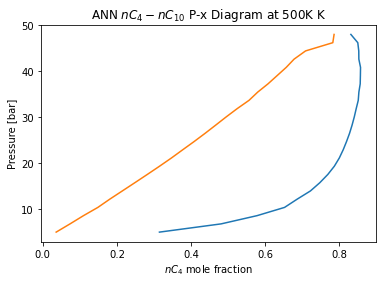

In [11]:
pr.y_nC4 = np.array(pr.y_nC4)
pr.x_nC4 = np.array(pr.x_nC4)
pr.Pressure

fig = plt.figure('''figsize=(20,20)''')
ax = fig.add_subplot(111)
ax.plot(pr.y_nC4[:,0], pr.Pressure, label='Dew Curve')
ax.plot(pr.x_nC4[:,0], pr.Pressure, label='Bubble Curve')
ax.set_title(r'ANN $nC_4-nC_{10}$ P-x Diagram at 500K K')
ax.set_xlabel(r'${nC_4}$ mole fraction')
ax.set_ylabel('Pressure [bar]')

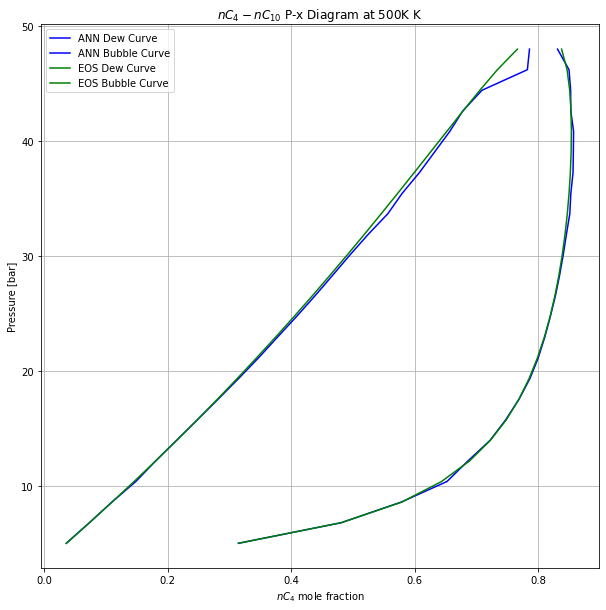

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(pr.y_nC4[:,0], pr.Pressure, label='ANN Dew Curve', color='b')
ax.plot(pr.x_nC4[:,0], pr.Pressure, label='ANN Bubble Curve', color='b')
ax.plot(EOS_y_nC4[:,0], EOS_Pressure, label='EOS Dew Curve', color='g')
ax.plot(EOS_x_nC4[:,0], EOS_Pressure, label='EOS Bubble Curve', color='g')
ax.set_title(r'$nC_4-nC_{10}$ P-x Diagram at 500K K')
ax.set_xlabel(r'${nC_4}$ mole fraction')
ax.set_ylabel('Pressure [bar]')
ax.legend()
ax.grid()

In [13]:
x = ((EOS_y_nC4[:,0] - pr.y_nC4[:,0])**2)/(len(EOS_y_nC4)-1)
x

array([0.00000000e+00, 8.63174468e-20, 3.55672974e-08, 3.26439679e-06,
       2.78071394e-07, 7.00489120e-09, 3.86398643e-08, 1.32965312e-09,
       7.30318478e-08, 7.08937626e-08, 2.04503749e-08, 6.72886358e-09,
       2.51762928e-08, 4.93764276e-08, 1.04332009e-07, 2.06411656e-07,
       6.78473665e-07, 3.46110658e-07, 7.90175469e-07, 5.37173284e-07,
       5.27097831e-07, 3.94281053e-09, 9.34655397e-08, 4.06909445e-07,
       1.81066829e-06])

In [14]:
np.sum(x)

9.375428116135203e-06

In [15]:
# Get sample standard deviation
x = ((EOS_y_nC4[:,1] - pr.y_nC4[:,1])**2)/(len(EOS_y_nC4)-1)
np.sqrt(np.sum(x))

0.003061932088752973

In [16]:
# Get sample standard deviation
x = ((EOS_y_nC4[:,0] - pr.y_nC4[:,0])**2)/(len(EOS_y_nC4)-1)
np.sqrt(np.sum(x))

0.0030619320887529827

In [17]:
# Get sample standard deviation
x = ((EOS_x_nC4[:,0] - pr.x_nC4[:,0])**2)/(len(EOS_y_nC4)-1)
np.sqrt(np.sum(x))

0.011550873654853794

In [18]:
# Get sample standard deviation
x = ((EOS_x_nC4[:,1] - pr.x_nC4[:,1])**2)/(len(EOS_y_nC4)-1)
np.sqrt(np.sum(x))

0.011550873654853811

In [20]:
(EOS_y_nC4[:,1] - pr.y_nC4[:,1])

array([ 0.00000000e+00, -1.43931189e-09, -9.23912949e-04,  8.85130063e-03,
       -2.58335314e-03, -4.10021205e-04, -9.62993636e-04,  1.78638392e-04,
        1.32392007e-03,  1.30439653e-03,  7.00577617e-04,  4.01861576e-04,
        7.77322988e-04,  1.08859279e-03,  1.58239319e-03,  2.22573128e-03,
        4.03526554e-03,  2.88212696e-03,  4.35479176e-03,  3.59056525e-03,
        3.55673276e-03, -3.07615755e-04,  1.49772259e-03,  3.12503227e-03,
       -6.59211946e-03])

In [21]:
0.0030619320887529827 / np.average(pr.x_nC4[:,0]) * 100

0.7181982963647854